In [27]:
from sys import argv
from scipy.optimize import curve_fit

from numpy import linspace,array,inf,savetxt,concatenate,transpose,reshape
from pylab import plot, ylim, xlim, savefig, show, xlabel, ylabel, title


In [18]:
eAffinityIoni={'Ag_FQ': [-125.6, 0, 731.0, 2803.93, 6161.93, 10889.93],
         'Al_FQ': [-41.762, 0, 577.54, 2394.2200000000003, 5139.0],
          'Au_FQ': [-222.747, 0, 890.13, 2839.43, 5729.43],
           'Co_FQ': [-63.898, 0, 760.4, 2408.79, 5641.09, 10588.09, 18259.09],
            'Cu_FQ': [-119.235, 0, 745.48, 2703.4, 6258.4, 11794.4],
             'Fe_FQ': [-14.785, 0, 762.47, 2325.45, 5282.85, 10580.85],
             'Mg_FQ': [40, 0, 737.75, 2188.4300000000003, 9921.11, 20463.620000000003],
               'Mo_FQ': [-72.1, 0, 684.32, 2243.32, 4861.32, 8752.32],
                'Ni_FQ': [-111.65, 0, 737.14, 2490.17, 5885.17, 11184.17],
                 'Pb_FQ': [-34.4204, 0, 715.6, 2166.02, 5247.1900000000005, 9331.66],
                  'Pd_FQ': [-54.067, 0, 804.38, 2679.38, 5856.38, 10294.380000000001],
                   'Pt_FQ': [-205.041, 0, 864.4, 2655.4, 5455.4, 9605.4],
                    'Ta_FQ': [-31.0, 0, 728.42, 2288.42, 4518.42, 7898.42],
                     'Ti_FQ': [-8, 0, 658.81, 1968.6499999999999, 4621.2],
                      'W_FQ': [-78.76, 0, 758.76, 2338.76, 4848.76, 8538.76],
                       'Zr_FQ': [-41.1, 0, 640.1, 1907.1, 4143.1, 7463.97]}


In [19]:
oxidationStates = {"Cu_FQ":[-1,0,1,2,3,4],
        "Ag_FQ":[-1,0,1,2,3,4],
        "Au_FQ":[-1,0,1,2,3],
        "Ni_FQ":[-1,0,1,2,3,4],
        "Pd_FQ":[-1,0,1,2,3,4],
        "Pt_FQ":[-1,0,1,2,3,4],
        "Al_FQ":[-1,0,1,2,3],
        "Pb_FQ":[-1,0,1,2,3,4],
        "Fe_FQ":[-1,0,1,2,3,4],
        "Mo_FQ":[-1,0,1,2,3,4],
        "Ta_FQ":[-1,0,1,2,3,4],
        "W_FQ":[-1,0,1,2,3,4],
        "Mg_FQ":[-1,0,1,2,3,4],
        "Co_FQ":[-1,0,1,2,3,4,5],
        "Ti_FQ":[-1,0,1,2,3],
        "Zr_FQ":[-1,0,1,2,3,4]}# for Zr try adding -1 oxidation states


coeff={"Cu_FQ":[14.26,4.35,-4.65,95.65,-90.36,25.57],
        "Ag_FQ":[12.70,3.40,6.79,96.27,-105.00,31.36],
        "Au_FQ":[27.87,2.67,-84.13,118.37,0,0],
        "Ni_FQ":[15.93,3.56,-17.53,100.92,-83.20,21.71],
        "Pd_FQ":[17.79,2.37,-22.66,131.86,-118.78,32.56],
        "Pt_FQ":[19.03,3.26,-15.85,108.34,-103.30,29.73],
        "Al_FQ":[15.35,3.40,0,14.86,0,0],
        "Pb_FQ":[18.03,3.49,-40.18,113.70,-73.58,14.90],
        "Fe_FQ":[17.75,4.64,-32.54,118.11,-96.81,26.45],
        "Mo_FQ":[13.48,6.45,-11.15,80.26,-74.15,20.85],
        "Ta_FQ":[15.39,4.30,-17.24,109.12,-109.02,32.48],
        "W_FQ":[16.42,5.05,-19.87,101.90,-93.38,26.34],
        "Mg_FQ":[23.86,4.37,-81.77,104.19,0,0],
        "Co_FQ":[19.88,3.78,-41.26,117.64,-77.32,16.51],
        "Ti_FQ":[11.19,4.70,10.79,89.56,-167.13,80.11],
        "Zr_FQ":[13.33,8.29,-19.82,67.28,-52.13,13.21]}

coeffNew={"Cu_FQ":[12.654276,8.698442,1.621713,69.358248,-66.837600,19.036539],
        "Ag_FQ":[11.443338,6.801678,11.696720,75.839323,-86.610914,26.249633],
        "Au_FQ":[14.412009,5.3494,27.596179,89.334528,-172.252298,77.050798],
        "Ni_FQ":[14.617610,7.112866,-12.398378,79.543090,-63.963936,16.362644],
        "Pd_FQ":[16.911715,4.741910,-19.235499,117.606734,-105.958291,29.003044],
        "Pt_FQ":[17.831173,6.520127,-11.143577,88.747901,-85.671540,24.836594],
        "Al_FQ":[14.32765,2*3.40,0,13.02493407,0,0],
        "Pb_FQ":[16.740764,6.979499,-35.147675,92.723434,-54.700812,9.652110],
        "Fe_FQ":[16.040623,9.283771,-25.846308,90.212611,-71.702508,19.474986],
        "Mo_FQ":[11.098998,12.906887,-1.841582,41.477676,-39.243762,11.153658],
        "Ta_FQ":[13.802009,8.594713,-11.046484,83.296325,-85.781293,26.024197],
        "W_FQ":[14.556688,10.091378,-12.590780,71.577511,-66.085065,18.763973],
        "Mg_FQ":[21.19907649,2*4.37,-74.9267030,93.70053525,0,0],
        "Co_FQ":[17.528993,7.557420,-30.812369,93.291422,-61.383587,13.157426],
        "Ti_FQ":[10.861078,9.394910,4.155035,64.381918,-112.777731,54.011802],
        "Zr_FQ":[10.20833,16.596686,0,2.867983,0,0]}


coeffWithENeg={
    "Cu_FQ":[ 11.600000,7.630000,7.043849,69.384399,-72.367946,21.422710],
    "Ag_FQ":[ 11.760000,7.580000,9.916135,73.828095,-82.504840,24.754679],
    "Au_FQ":[ 15.840000,7.920000,3.819905,76.781024,-88.364326,27.803977],
    "Ni_FQ":[ 11.630000,8.080000,1.639384,62.120130,-58.281871,16.327555],
    "Pd_FQ":[ 13.600000,7.590000,-4.265055,90.514873,-90.166318,25.94234],
    "Pt_FQ":[ 14.100000,6.150000,6.912295,73.899938,-87.010038,27.477568],
    "Al_FQ":[ 9.620000,5.540000,17.795471,82.933474,-136.314207,57.01959],
    "Pb_FQ":[ 14.440000,6.700000,-23.294447,88.209224,-63.798468,14.4750],
    "Fe_FQ":[ 11.100000,9.490000,-2.169062,67.501884,-69.752761,21.78726],
    "Mo_FQ":[ 13.300000,7.380000,-10.583517,75.399716,-69.164277,19.3708],
    "Ta_FQ":[ 8.900000,7.120000,13.003752,68.118329,-92.823346,31.175669],
    "W_FQ":[ 14.640000,7.790000,-12.226447,82.024963,-78.400969,22.6347],
    "Mg_FQ":[ 7.620000,7.680000,59.405896,76.950474,-315.833222,203.0481],
    "Co_FQ":[ 11.430000,8.310000,-2.864281,56.062836,-43.617468,10.23186],
    "Ti_FQ":[ 9.160000,7.180000,-2.392933,59.341887,-56.731009,16.325683],
    "Zr_FQ":[ 7.750000,6.420000,6.079969,41.135736,-43.590145,12.572236]}


In [20]:
names = ["Cu_FQ",
        "Ag_FQ",
        "Au_FQ",
        "Ni_FQ",
        "Pd_FQ",
        "Pt_FQ",
        "Al_FQ",
        "Pb_FQ",
        "Fe_FQ",
        "Mo_FQ",
        "Ta_FQ",
        "W_FQ",
        "Mg_FQ",
        "Co_FQ",
        "Ti_FQ",
        "Zr_FQ"]


In [21]:
ktho = [8.69844189,
        6.80167773,
        5.34946767,
        7.1128656,
        4.7419104,
        6.5201268,
        6.8164962,
        6.97949937,
        9.283771455,
        12.90688737,
        8.5947126,
        10.09137807,
        8.7428973,
        7.5574197,
        9.39490998,
        16.5966864]


def f(a,x):
    sum=0
    for index in range(1,len(a)+1):
        sum=sum+a[index-1]*x**index
    return sum

Cu_FQ


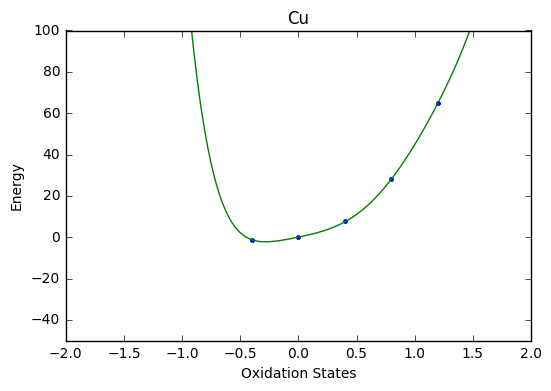

Ag_FQ


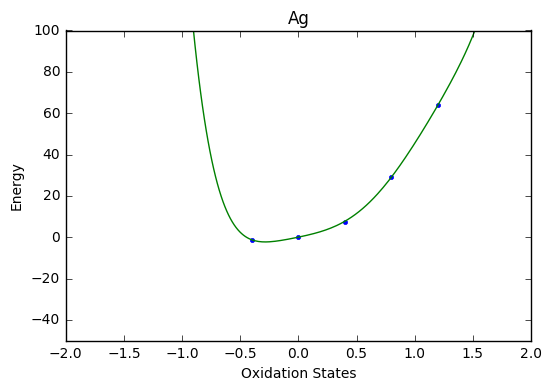

Au_FQ


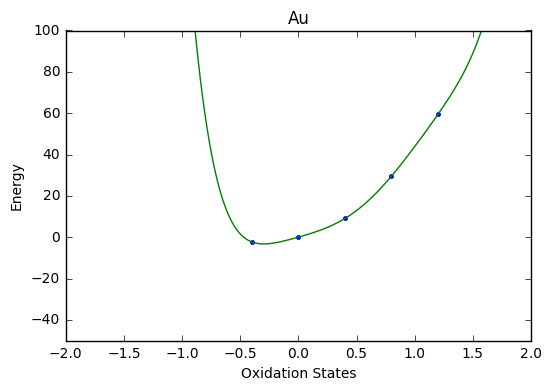

Ni_FQ


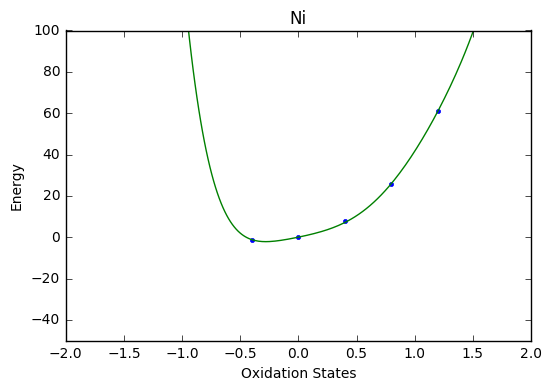

Pd_FQ


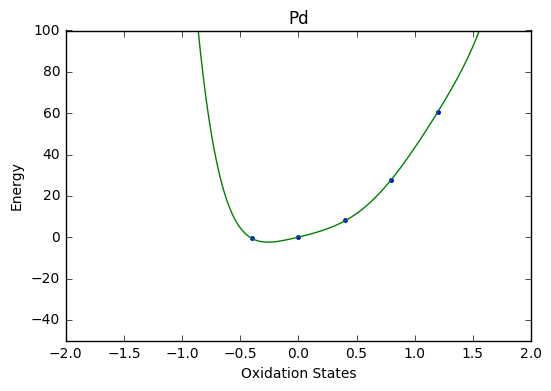

Pt_FQ


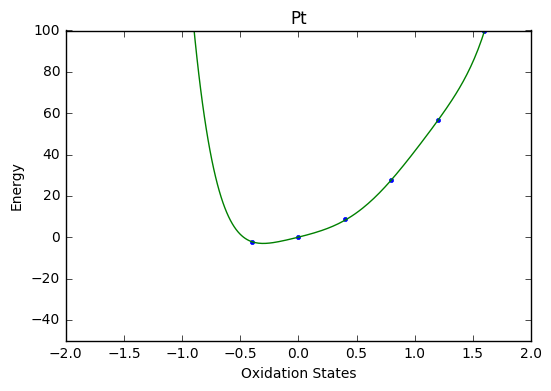

Al_FQ


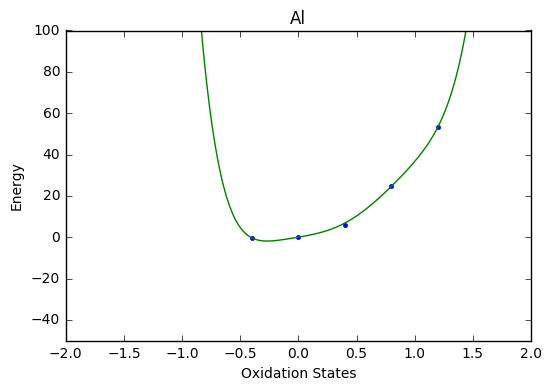

Pb_FQ


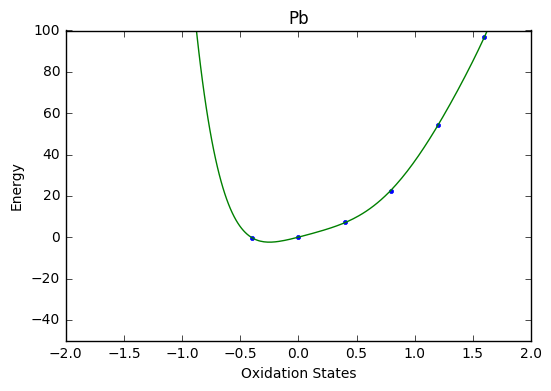

Fe_FQ


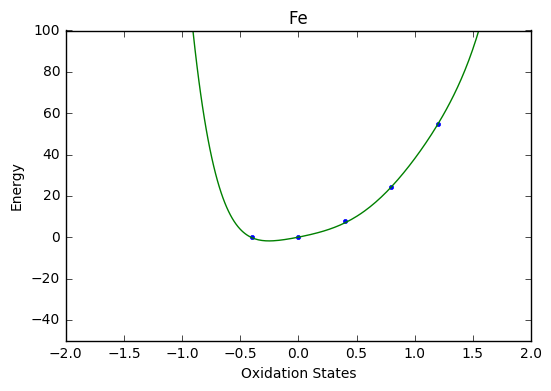

Mo_FQ


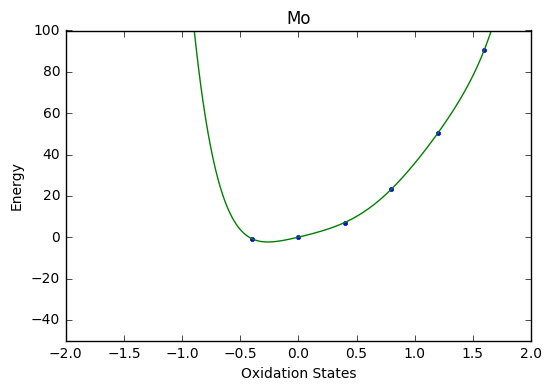

Ta_FQ


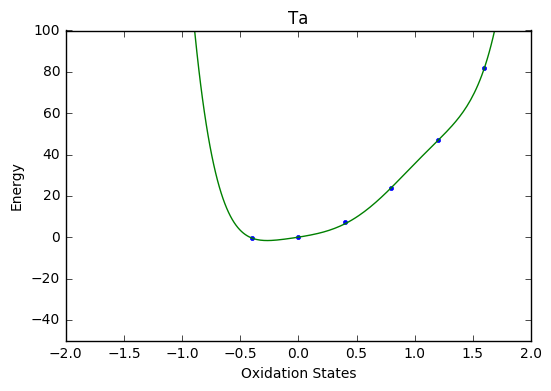

W_FQ


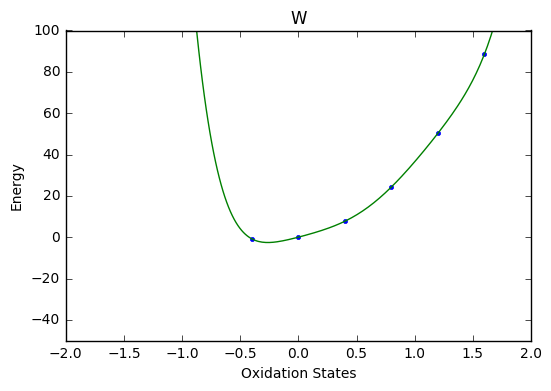

Mg_FQ


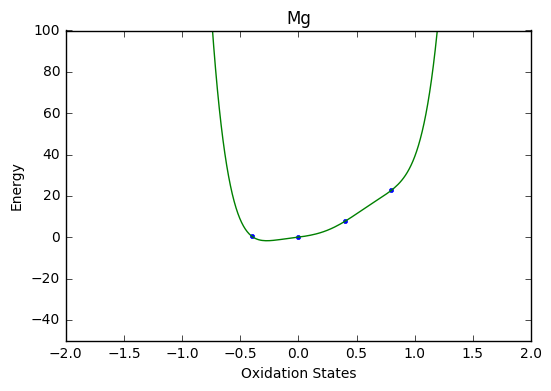

Co_FQ


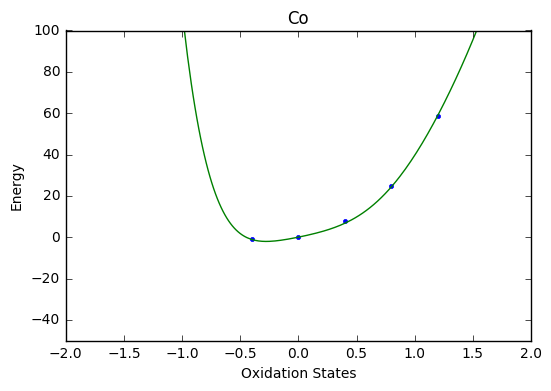

Ti_FQ


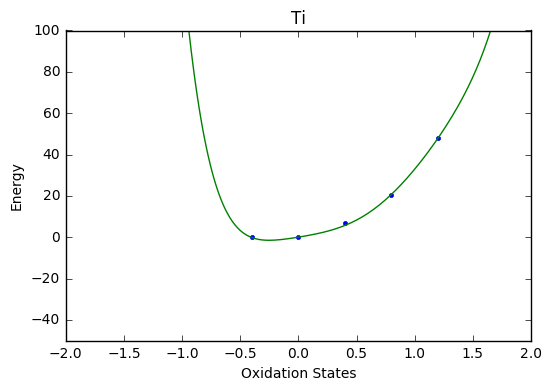

Zr_FQ


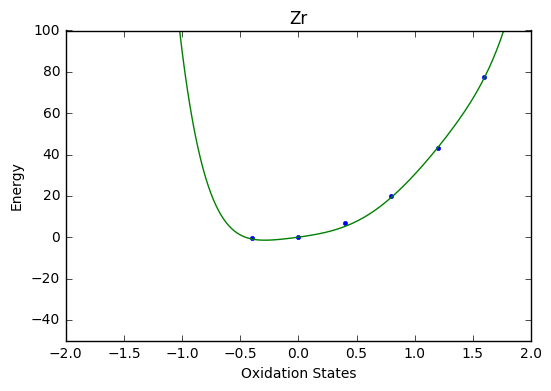

In [14]:
import numpy as num
for var in range(len(names)):
    print(names[var])
    q=array(oxidationStates[names[var]])*0.4
    ene=array(eAffinityIoni[names[var]])*0.0103643
    a=array(coeffWithENeg[names[var]])
    x=linspace(-8,8,1000)
    plot(q,ene,".")
    plot(x,f(a,x))
    xlabel("Oxidation States")
    ylabel("Energy")
    title(names[var][:-3])
    ylim([-50,100])
    xlim([-2,2])
    file=open("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/%sf.dat"%(names[var][:-3]),'w')
    fileEI=open("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/%sEI.dat"%(names[var][:-3]),'w')
    file.write("# x\t f\n")
    fileEI.write("#x\tf\n")
    for var in x:
        file.write("%f\t%f\n"%(var,f(a,var)))
        
    for var in range(len(q)):
        fileEI.write("%f\t%f\n"%(q[var],ene[var]))
        
    #savetxt("/home/hbhattar/PERSONAL/FDEAM_PAPER/plots/%s.dat"%(names[var][:-3]),)
    #savefig("%s.pdf"%(names[var]))
    file.close()
    fileEI.close()
    show()

In [22]:
chiPauling={"Cu_FQ":1.9,
        "Ag_FQ":1.93,
        "Au_FQ":2.54,
        "Ni_FQ":1.91,
        "Pd_FQ":2.2,
        "Pt_FQ":2.28,
        "Al_FQ":1.61,
        "Pb_FQ":2.33,
        "Fe_FQ":1.83,
        "Mo_FQ":2.16,
        "Ta_FQ":1.5,
        "W_FQ":2.36,
        "Mg_FQ":1.31,
        "Co_FQ":1.88,
        "Ti_FQ":1.54,
        "Zr_FQ":1.33}


In [32]:
IE=[]
chi=[]
for ele in names:
    IE.append((eAffinityIoni[ele][2]-eAffinityIoni[ele][0])*0.0103643)
    chi.append(chiPauling[ele])
def f(x,a,b):
    return a*(x+b)

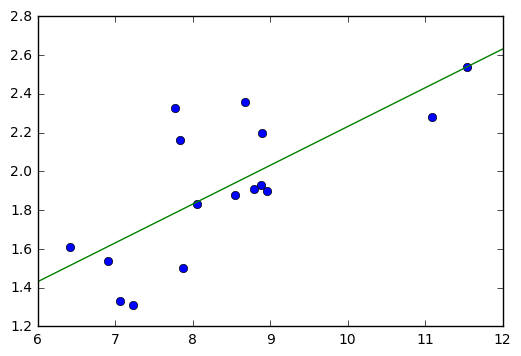

In [39]:
x=linspace(6,12,100)
param,covmat=bestFit=curve_fit(f,IE,chi,)
plot(IE,chi,'o')
plot(x,f(x,param[0],param[1]))
show()

In [42]:
param,covmat


(array([ 0.20018887,  1.14800141]),
 array([[  2.55017970e-03,  -1.21740275e-01],
        [ -1.21740275e-01,   5.92490610e+00]]))

In [43]:
import os

In [53]:
c,a=os.popen("tail -1 ../L10/box.txt").read().split()[1:3]

In [56]:
c,a=float(c),float(a)

In [57]:
c,a

(33.9952, 29.5871)